## 1. Fasea: Problema Formalizatzen

#### [Ikasle]

Community Detection proiektuaren 1. fasean problema formalizatuko dugu. Dagoeneko klasean ikusi dugu, optimizazio problema bat formalizatzeak zer dakarren. Gogoratze aldera:
<ul>
  <li> soluzio bideragarrien espazioa definitzea,
  <li> soluzioak errepresentatzeko modu egoki bat asmatzea eta
  <li> helburu-funtzioa definitzea.
</ul>


#### Entregablea

Lehenengo fasea ebaluatu ahal izateko, notebook hau bera igo beharko duzue eGelara eskatzen diren atazak egoki erantzunda. eGelan zehazten dira <b>egun eta orduan</b>. Garaiz ez entregatzeak, 0 bat suposatuko du ebaluagarria den proiektuaren zati horretan. Adi! Ez dute balio aitzakiek, denbora soberan duzue aurretiaz egiteko, eGelara igotzeko eta aseguratzeko entregatuta geratu dela. <b>Ez dut onartuko atzerapenik</b>.

### Soluzio bideragarrien espazioa

Proiektuan, aipatu dugun bezela, elkarlan komunitate desberdinak detektatu nahi ditugu. Horretarako, lehenenik eta behin erantzun beharreko galdera hurrengoa da: <i> Zer da komunitate bat?</i> Sarreran sortu dugun grafoan pentsatuz gero, <i> Nola adieraziko genituzte komunitateak grafoan?</i>
Optimizazio konbinatorioko bibliografia begiratzea proposatzen dizuet (Google Scholar, Scopus, Web of Science...). Problema honek, berria ematen duen arren, hamarkada asko atzera aztertu zen lehenengo aldiz.

Jarrian dagoen eremuan, 400 hitzetan, azaldu zer den Community Detection problema, eta eman aurreko galderei erantzuna. Behar izanez gero, gehitu irudiak. Garrantzitsua, erabilitako erreferentzia bibliografikoak testuan zuzenean adierazi beharko dituzue.

**Zer da komunitate bat?**

Kumunitate bat gizakien multzo bat da, non, elkarren artean hainbat ezaugarri partekatzen dituzten, adibidez: Hizkuntza, geografia, balioak, etab.

**Nola adieraziko genituzte komunitateak grafoan?**

Indibiduo bakoitzeko nodo bat, eta arkuak adieraziko dituzte beraien arten sortutako artikuluak, edota, amankomuneko dokumentuak/lanak, gero bere modularitatea lortzeko eta horrela neurtu emandako soluzioa.

**Community Detection problema:**

Komunitateen egitura sareetan aurkitzea eta aztertzea azkenaldiko gaia da
fisika komunitatearen barruan, baina orain arte proposatutako metodo gehienak oso desegokiak dira sare handientzako kostu konputazionalagatik.

Hemen aglomerazio hierarkikoa komunitateko egitura hautemateko algoritmoa aurkezten da, lehian dauden algoritmo asko baino azkarragoa dena: bere n erpinak eta m ertzak dituen sare batean exekutatzen den denbora O (md log n)  da, non d komunitatearen egitura deskribatzen duen dendrograma sakonera da.

Problema honetan adieraziko dira grafo moduan komunitateak. Non nodo bakoitza entitate bat izango den, adibidez: Pertsona bat, internet web bat, etab. Nodo hauek beraien artean informazioa edo paper batzuk partekatuko dute eta datu horiek ardatzen bidez errepensentatuko dira grafoan. Problema honek grafoan dauden komunitateak aurkitzea du helburu. Algoritmo asko erabili dira urteetan zehar problema hau gauzatzeko, adibidez: Kernighan–Lin algorithm, spectral partitioning, edo hierarchical clustering. Baina algoritmo hauek ez dira oso azkarrak honako problemak burutzeko, horregatik, beste algoritmo proposatu egin dira azkeneko urteetan. Erabiliko dugun algoritmoa greedy motako bilaketa bat egiten dut, hortaz, emandako soluzioak hobeagoak izango dira, eta baita ikusi da nola Girvan eta Newman algoritmoak baino azkarragoa dela, O((m + n)n), edo O(n²) grafo urri batean.

Problema hau neurtzeko modularitatea erabiliko da, non gure helburua honen balioa maximizatzea izango den.


**Bibliografia**

https://www.sciencedirect.com/science/article/pii/S0370157309002841 


https://arxiv.org/pdf/cond-mat/0408187.pdf 

### Soluzioen errepresentazioa

Behin aurreko galderak erantzun ditugula, eta badakigula nola adierazi komunitate bat, soluzioak errepresentatzeko kodeketa bat aukeratu behar dugu. Klasean hainbat kodeketa ikusi ditugu, horietako bat aproposa izan daiteke komunitateak identifikatzeko. Jarraian, proposatu soluzio batzuk esku artean dugun problemarentzako. <i>Nola kodetuko dugu komunitateen identifikazio bat?</i> Pentsatu...

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# SQL
import sqlite3

# Pandas
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

def sortu_grafoa():

    # Datuak irakurri
    # BETE HEMEN 8 lerro

    # Get data

    connect = sqlite3.connect('/content/drive/MyDrive/BH/database.sqlite')
    query = """
    SELECT pa.paper_id, pa.author_id, a.name
    FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
    JOIN authors as a ON pa.author_id = a.id
    WHERE p.Year BETWEEN '2014' AND '2015'
    """
    df = pd.read_sql(query, connect)

    # Sortu grafoa
    # BETE HEMEN 7-10 lerro
    # Initialize graph
    G = nx.Graph()

    # Transform
    # Autorearen IDa erabili beharrean erabili izena.
    for p, a in df.groupby('paper_id')['name']: 
        for u, v in itertools.combinations(a, 2):
            if G.has_edge(u, v):
                G[u][v]['weight'] +=1
            else:
                G.add_edge(u, v, weight=1)
                
    # Print graph size
    print('\nAutore kopurua grafoan:', G.number_of_nodes())
    print('\nElkarlan kopurua grafoan:', G.number_of_edges())
    return G

def bistaratu_grafoa(G):
    # BETE HEMEN 6 lerro
    plt.figure(figsize=(13, 9))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 20, node_color='0.75')
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
    plt.show()

    plt.axis('off')
    plt.show()

In [4]:
### Dei orokorrak
G=sortu_grafoa()


Autore kopurua grafoan: 1843

Elkarlan kopurua grafoan: 3215


In [5]:
### Eman soluzioen adibide batzuk
import random

number_of_communities = 30 -1 ##Bat kentzen dugu 0tik N-1era joango garelako

##Building soluzioa_1 for number of communities specified and shuffling
soluzioa_1=list()
numOfCommunity=number_of_communities
for i in range(0,G.size()):
  if (numOfCommunity==0):
    numOfCommunity=number_of_communities
  soluzioa_1.append(numOfCommunity)
  numOfCommunity-=1

## Gure inplementazioa
partition1= dict(zip(G.nodes, soluzioa_1))

### Helburu-funtzioa

Dagoeneko badakigu zer den komunitate bat, eta nola adierazi ere. Esan dugu, elkarlanen bitartez identifikatuko ditugula komunitateak. Baina, zerk eragiten du autore bat komunitate baten parte izateak? Adibidez, nahiko al da behin artikulu bat idaztea beste autore batzuekin, komunitatearen parte izateko? Erantzuna, argi dago, ezezkoa dela.

Jarraian dagoen erreferentzian oinarrituko gara, helburu-funtzio egoki bat aukeratzeko. Zein aukeratuko zenuke? Pentsatu ondo! Badago bat oso egokia!

   <i> Clauset, A.; Newman, M. E. J. \& Moore, C. Finding community structure in very large networks, Physical Review E 2004, 70, 066111</i>
   
Jarraian eman 200 hitzetako azalpen bat aukeratu duzun helburu-funtzioaren inguruan. Horrez gain, adierazi ekuazio matematiko bidez, helburu-funtzioa (LaTeX notazioa onartzen du konpiladoreak). Ondoren, inplementatu helburu-funtzioa ere (funtzioaren egitura orokorra planteatzen dizuet). Azkenik helburu-funtzioaren pseudokode orokor bat ere idatzi beharko duzu.

Lehenik, azaldu beharrekoa da modularitatea. Modulariatea sare baten propietate bat da eta sarearen separazioa komunitateetan deskribatzen du. Komunitateak daude erpinen arteko konexio ugari dauden eremuetan eta konexio gutxiko tokietan komunitateekiko konexioak egiten dira.

Horregatik, gure helburu funtzioaren balioa handitu nahi dugu modularitate orduan eta handiagoa izan dadin.

$v$ eta $w$: erpinak definituko dute.

$A_{vw}$: albotasun matrizearen elementua da non $1$ balioa izango du $v$ eta $w$ balioak konektatuta baldin badaude eta $0$ bestela.

$c_{v}$: $v$ erpinari dagokion komunitatea errepresentatuko du.

$c_{w}$: $w$ erpinari dagokion komunitatea errepresentatuko du.

$m$: grafo batean dauden ertz kopurua da.

$δ(i, j)$:  $δ$ funtzioa $δ(i, j)$, $i=j$ baldin bada, $1$ izango da.




$k_{v}$: $v$ erpinaren maila da. Horrela definitzen da:

$k_{v} = \sum_{w}A_{vw}$

bi erpinen artean ertz bat egoteko probabilittean ondorengoa da:

$\frac{k_{v}k_{w}}{2m}$.

Zenbat erpin konektatuta daude komunitateka horrela definitzen da:

$\frac{\sum_{vw}A_{vw}δ(c_{v},c_{w})}{\sum_{vw}A_{vw}}=\frac{1}{2m} \sum_{vw}A_{vw}δ(c_{v},c_{w})$

Hortaz, modularitatea horrela definitzen dugu:

$Q=\frac{1}{2m} \sum_{vw} [A_{vw}−\frac{k_{v}k_{w}}{2m}]δ(c_{v}, c_{w})$


Hau izanez gero, gure algoritmorako sinplifikatzeko ondorengo berdinketak egin ditzazkegu:

$i$ komunitatetik $j$ komunitaterako ertzen frakzioa honela defini daiteke:

$e_{ij}=\frac{1}{2m}\sum_{vw}A_{vw}δ(c_{v}, i)δ(c_{w}, j)$
as

$i$ garren komunitatean bukatzen diren erpinak eta konektatuak daudenak $i$ri:

$a_{i}=\frac{1}{2m}\sum_{v}k_{v}δ(c_{v}, i)$

Hortaz, $δ(c_{v}, c_{w})=\sum_{i}δ(c_{v}, i)δ(c_{w}, j)$ eginez esan dezakegu modularitatea ondorengoa dela:

$Q=\frac{1}{2m} \sum_{vw} [A_{vw}−\frac{k_{v}k_{w}}{2m}]\sum_{i} δ(c_{v}, i)δ(c_{w}, i)=\sum_{i}[\frac{1}{2m}\sum_{vw}A_{vw}δ(c_{v}, i)δ(c_{w}, i)−\frac{1}{2m}\sum_{v}k_{v}δ(c_{v}, i) \frac{1}{2m}\sum_{w}k_{w}δ(c_{w}, i)]=\sum_{i}(e_{ii}−a_{i}^{2}).$

Laburpen modura, ondorengo funtzioa maximizatzea da helburua:
$Q=\sum_{i}(e_{ii}−a_{i}^{2}).$


In [6]:
# pip install ipynb exekutatu liburutegi hau erabili ahal izateko.
from itertools import product
 
import community
import networkx as nx
import numpy as np
 
### Helburu-funtzioa
def modularitatea(G, partizioa, weight='weight'):
    
    ### Bete hemen 15-20 lerro
    
    inc = dict([])
    deg = dict([])
    arkuak = G.size(weight=weight)
    for nodoa in G:
        com = partizioa[nodoa]
        deg[com] = deg.get(com, 0.) + G.degree(nodoa, weight=weight)
        for neighbor, datas in G[nodoa].items():
            erpin_pisua = datas.get(weight, 1)
            if partizioa[neighbor] == com:
                if neighbor == nodoa:
                    inc[com] = inc.get(com, 0.) + float(erpin_pisua)
                else:
                    inc[com] = inc.get(com, 0.) + float(erpin_pisua) / 2.
    modul = 0.
    for com in set(partizioa.values()):
        modul += (inc.get(com, 0.) / arkuak) - \
               (deg.get(com, 0.) / (2. * arkuak)) ** 2
    return modul

print("1. soluzioaren modularitatea: ", modularitatea(G, partition1))

1. soluzioaren modularitatea:  -0.018890235733822907


## 2. Fasea: Algoritmoak diseinatzen

#### [Ikasle]

Community Detection proiektuaren 1. fasea entregatu duzue, eta feedback-a jaso ere. Klasean hainbat algoritmo ikusi ditugu, batzuk soluzio bakarrean oinarritutakoak, beste batzuk aldiz, populazio bat erabiltzen dutenak. Horiez gain, hibridatzeko teknikak ere ikusi ditugu. Bigarrengo fase honetan, bi algoritmo diseinatu beharko dituzue, bata soluzio bakarrean oinarritutakoa, eta bestea poblazionala. Ez hori bakarrik, bi algoritmoetako batek operadore probabilistikoak erabili beharko ditu, Estimation of Distribution Algorithms (EDAk) edo Ant Colony Optimization (ACO)-ek egiten duten bezala. Algoritmoen helburua, komunitate kopuru jakin bat emanik, modularitatea maximizatzen duen komunitate banaketa (soluzioa) bilatzen saiatzea da.

Errepasatu gaitegian zehar ikusi ditugun algoritmo guztiak, eta horiek kontuak izanik, libre zarete nahi dituzuen diseinuak sortzeko, baita ere hibridoak! Adi! Egiten duzuen aukeraketa argudiatu egin beharko duzue.


#### Entregablea

Bigarrengo fasea ebaluatu ahal izateko, notebook honetan bertan algoritmoen diseinua eta implementazioa proposatu beharko duzue. Gogoratu algoritmo bat azaltzeko modurik errezena diagrama bat egitea dela. Adi! Atal bakoitzean hartutako erabakiak eta garatutako metodoak egoki argudiatu beharko dituzue. Ez argudiatzeak edo lana garaiz ez entregatzeak penalizazioa jasoko dute ebaluagarria den proiektuaren zati honetan. eGelan zehazten dira notebook-a igotzeko <b>egun eta orduak</b>.

Momentuz, ez daukazue algoritmoen exekuzio eta konparaketak egin behar. Hirugarren fasean, esperimentazioaren inguruko baldintzak emango dizkizuet, eta, horrez gain, txostenaren idazketa burutu beharko duzue.

# HIRUGARREN FASEA

AUKERATUTAKO ALGORITMOAK ONDORENGOAK DIRA:

1-ILS Algoritmo bat swap search space batekin

2-EDA Algoritmo bat populazio aleatorio bat erabiliz

ITERATED LOCAL SEARCH:

FLUXU DIAGRAMA:

1.-swap eraldaketa erabiliz searchSpace bat sortzen dugu

2.-lehenengo iterazioa hasten dugu.

3.-ausazko soluzio bat hartzen dugu eta haien albokoak begiratzen ditugu

2.-soluzio hoberenera joaten gara, eta berriro berdina egiten dugu: albokoak begiratu

2.-soluzio hobeagoa ez baldin badago maximo lokal batera ailegatu gara beraz berriro bigarren pausura bueltatzen gara.

(iterazio kopurua espezifikatzen da, limite bat ezartzeko.)

In [16]:
#dict(zip(G.nodes, soluzioa_1))
def swap(soluzioa, i, j):
    ## BETE HEMEN (3 lerro)
    aux=soluzioa[i]
    soluzioa[i]=soluzioa[j]
    soluzioa[j]=aux
    return soluzioa

def perturbateSolWithSwap(G, strengthOfSwap, partition):
  solution = list(partition.values())
  for i in range(0,strengthOfSwap):
    j=random.randint(0, len(solution)-1)
    k=random.randint(0, len(solution)-1)
    swapSol=swap(solution,j,k)
  return dict(zip(G.nodes, swapSol))


def iterated_local_search(G, max_evals, strengthOfPerturbation, numCommunities):
    bestSolFitness=-100


    ##Building initialPartition for number of communities specified and shuffling
    solution=list()
    staticNumCommunities=numCommunities -1
    for i in range(0,G.size()):
      if (numCommunities==0):
        numCommunities=staticNumCommunities
      solution.append(numCommunities)
      numCommunities-=1
    random.shuffle(solution)
    currentPartition= dict(zip(G.nodes, solution))

    #first solution
    currentSolFitness=modularitatea(G, currentPartition)
    currentSol=currentPartition
    bestSolFitness=currentSolFitness
    bestSol=currentPartition
    max_evals-=1

    while max_evals>0:
      
      currentSol=perturbateSolWithSwap(G, strengthOfPerturbation, currentSol)
      currentSolFitness=modularitatea(G, currentSol)
      if currentSolFitness>bestSolFitness:
        bestSolFitness=currentSolFitness
        bestSol=currentSol.copy()
      else:
        currentSolFitness=bestSolFitness
        currentSol=bestSol.copy()
      max_evals-=1
      

      

    #print(bestSolFitness)
    return bestSolFitness, bestSol

ESTIMATION OF DISTRIBUTION ALGORITHM:

FLUXU DIAGRAMA:

1.-Populazio aleatorio bat sortzen dugu 

2.-Lehenengo eboluzioa hasten da 

3.-quickSort erabiliz gure sortutako populazioa ebaluatzen da 

4.-off_size tamaina adinako indibiduoak hartzen dira eredu probabilistikoa sortzeko 

5.-sel_size tamaina adinako indibiduak eraldatzen dira ereduaren arabera 

6.-berriro bigarren atalera bueltatzen gara

(eboluzio kopuru bat espezifikatzen da limite bat ezartzeko.)

In [8]:
#Defining quickSort

def partition(arr, population, low, high):
  i = (low-1)         # index of smaller element
  pivot = arr[high]     # pivot

  for j in range(low, high):

    # If current element is smaller than or
    # equal to pivot
    if arr[j] <= pivot:

      # increment index of smaller element
      i = i+1
      arr[i], arr[j] = arr[j], arr[i]
      population[i], population[j] = population[j], population[i]
  
  arr[i+1], arr[high] = arr[high], arr[i+1]
  population[i+1], population[high] = population[high], population[i+1]
  return (i+1)
  
# The main function that implements QuickSort
# arr[] --> Array to be sorted,
# low  --> Starting index,
# high  --> Ending index
  
# Function to do Quick sort
  
  
def quickSort(arr, population, low, high):
  if len(arr) == 1:
    return population
  if low < high:
    # pi is partitioning index, arr[p] is now
    # at right place
    pi = partition(arr, population, low, high)

    # Separately sort elements before
    # partition and after partition
    quickSort(arr, population, low, pi-1)
    quickSort(arr, population, pi+1, high)

In [9]:
import random
import bisect 
def Estimation_of_distribution_alg_UMDA(G, initialPartition, max_evals, populationNumber, off_size, sel_size, numCommunities):
  bestFitness=-100
  initialMaxEvals=max_evals
  bestSol=[]
  population=[]
  quickSortArray=[]

  #creating a single individual with the maximum number of communities (later we will create populations by swapping the individual)
  solution=list()
  staticNumCommunities=numCommunities -1
  for i in range(0,G.size()):
    if (numCommunities==0):
      numCommunities=staticNumCommunities
    solution.append(numCommunities)
    numCommunities-=1
  random.shuffle(solution)
  currentPartition= dict(zip(G.nodes, solution))


  #Creating random population
  for i in range(0,populationNumber):
    partitionCopy=currentPartition.copy()
    #shuffle keys!!!!!
    temp = list(partitionCopy.values())
    random.shuffle(temp)
    partitionCopy = dict(zip(partitionCopy, temp))
    #shufffle keys!!!!
    population.append(partitionCopy)


  #Starting first evolution
  while max_evals>0:

    if initialMaxEvals==max_evals:
      #Quicksort of population to order best solutions to worst
      
      for i in range(0,len(population)):
        quickSortArray.append(modularitatea(G, population[i]))
      
      quickSort(quickSortArray, population, 0, len(population)-1)
      population.reverse()
      quickSortArray.reverse()
      max_evals-=len(population)
    
    
    #delete the last elements of the array 
    
    elif initialMaxEvals!=max_evals:
      for i in range(len(quickSortArray),len(quickSortArray)+sel_size-1):
        quickSortArray.append(modularitatea(G, population[i]))
      
      quickSort(quickSortArray, population, 0, len(population)-1)
      population.reverse()
      quickSortArray.reverse()
      del population[-(sel_size-1):]
      del quickSortArray[-(sel_size-1):]
      max_evals-=sel_size
    
    
    
    #print(quickSortArray)

    #Update solutions:
    if quickSortArray[0]>bestFitness:
      bestFitness=quickSortArray[0]
      bestSol=population[0]


    #creating the EDA model that will be stored in the matrix probabilityMatrix
    probabilityMatrix=np.zeros((numCommunities, len(initialPartition)))
    for indexIndividual in range(0, off_size):
      currentIndividual=population[indexIndividual]
      currentIndividualValues = list(currentIndividual.values())
      for i in range(0,numCommunities):
        for j in range(0,len(initialPartition)):
          if(i==currentIndividualValues[j]): 
            probabilityMatrix[i,j]+=1
    
    #optional to show matrix
    #with np.printoptions(threshold=np.inf):
      #print(probabilityMatrix)

    #Accumulated matrix creating
    accumulatedPMatrix=probabilityMatrix.copy()
    
    for j in range(0,len(initialPartition)):
      for i in range(0,numCommunities):
        if(i!=0):#if i == 0 then there is nothing before to add because its the beginning of a column
          accumulatedPMatrix[i,j]+=accumulatedPMatrix[i-1,j]

    #throw random probability and assign new community
    for indexIndividual in range(0, sel_size-1):
      currentIndividual=population[indexIndividual].copy()
      currentIndividualValues = list(currentIndividual.values())
      for j in range(0,len(initialPartition)):
        randint=random.randint(0,sel_size-1)
        for i in range(0,numCommunities):
          if(accumulatedPMatrix[i,j]>=randint and accumulatedPMatrix[i-1,j]<randint):#if i == 0 then there is nothing before to add because its the beginning of a column
            currentIndividualValues[j]=i-1
      #after changing the values re-assigning it to the population
      
      #START: start of adding missing values to the individual
      orderedValues=[]
      for value in currentIndividualValues:
          bisect.insort(orderedValues,value)
      
      repeatedValues=[]
      missingValues=[]
      for i in range(1,len(orderedValues)):
        if (orderedValues[i-1]==orderedValues[i]):
          if orderedValues[i] not in repeatedValues:
            repeatedValues.append(orderedValues[i])
        elif (orderedValues[i-1]!=orderedValues[i]-1): #Honek esan nahi du salto bat dagoela adibidez 21, 22, 23 izan beharrean agian 21,23 gertatzen ari da edo 20,23... hortaz balio horiek gehitu behar dira
          for j in range(orderedValues[i-1]+1,orderedValues[i]):
            missingValues.append(j)

      #missing values are added to individuals, on repeated positions.
      k=0
      while len(missingValues)!=0:
        if currentIndividualValues[k] in repeatedValues:
          repeatedValue=currentIndividualValues[k]
          currentIndividualValues[k]=missingValues[0]
          missingValues.remove(missingValues[0])
          repeatedValues.remove(repeatedValue)
        k+=1

      #FINISH: finish of adding missing values to the individual

      population.append(dict(zip(population[indexIndividual], currentIndividualValues)))
  return bestFitness, bestSol
  

RANDOM SEARCH IMPLEMENTATION

In [10]:
def random_search(G, max_evals, numCommunities):
  bestFitness=-100
  bestSolution=None

  solution=list()
  staticNumCommunities=numCommunities -1
  for i in range(0,G.size()):
    if (numCommunities==0):
      numCommunities=staticNumCommunities
    solution.append(numCommunities)
    numCommunities-=1
  random.shuffle(solution)
  currentPartition= dict(zip(G.nodes, solution))

  for i in range(1,max_evals):
    partitionCopy=currentPartition.copy()
    #shuffle keys!!!
    temp = list(partitionCopy.values())
    random.shuffle(temp)
    partitionCopy = dict(zip(partitionCopy, temp))
    #shufffle keys!!!
    currentFitness=modularitatea(G, partitionCopy)
    if currentFitness>bestFitness:
      bestFitness=currentFitness
      bestSolution=partitionCopy

  return bestFitness, bestSolution

In [11]:
random_search(G, 10, 10)

(0.007768018055567809,
 {'Nan Li': 7,
  'Rong Jin': 4,
  'Zhi-Hua Zhou': 6,
  'Fajwel Fogel': 5,
  "Alexandre d'Aspremont": 5,
  'Milan Vojnovic': 1,
  'Nisheeth Srivastava': 2,
  'Ed Vul': 3,
  'Paul R. Schrater': 3,
  'Sewoong Oh': 8,
  'Devavrat Shah': 6,
  'Siu On Chan': 3,
  'Ilias Diakonikolas': 4,
  'Rocco A. Servedio': 8,
  'Xiaorui Sun': 1,
  'Aaron van den Oord': 5,
  'Benjamin Schrauwen': 3,
  'Robert A. Vandermeulen': 5,
  'Clayton Scott': 5,
  'Qiang Liu': 2,
  'Alexander T. Ihler': 7,
  'Joseph G. Makin': 8,
  'Philip N. Sabes': 3,
  'Isabel Valera': 1,
  'Zoubin Ghahramani': 2,
  'Kumar Dubey': 4,
  'Qirong Ho': 1,
  'Sinead A. Williamson': 4,
  'Eric P. Xing': 7,
  'Anqi Wu': 3,
  'Mijung Park': 9,
  'Oluwasanmi O. Koyejo': 3,
  'Jonathan W. Pillow': 9,
  'Balaji Lakshminarayanan': 4,
  'Daniel M. Roy': 3,
  'Yee Whye Teh': 7,
  'Jason Chang': 6,
  'John W. Fisher III': 8,
  'Mehmet G?nen': 2,
  'Adam A. Margolin': 1,
  'Qichao Que': 1,
  'Mikhail Belkin': 6,
  'Yusu Wa

###PARAMETER TUNING

ESTIMATION OF DISTRIBUTION ALGORITHM PARAMETER TUNING (UMDA)

Number Of Communities: 25

   Population Size  Selection size      UMDA
0               25              10  0.010921
1               25              15  0.009897
2               25              20  0.009548
3               50              10  0.011052
4               50              15  0.008987
5               50              20  0.009707
6               75              10  0.010651
7               75              15  0.007893
8               75              20  0.009066


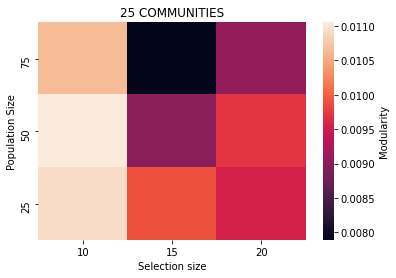

In [ ]:
#G, initialPartition, max_evals, populationNumber, off_size (probability matrix size), sel_size (individuals added to population), number_of_communities
import pandas as pd
populationNumber=[25,50,75]
sel_size=[10,15,20] 

list_pop_size = []
list_sel_size = []
list_avg_umda = []
for popNum in populationNumber:
  for selSize in sel_size:
    avg=0
    for i in range(1,3):
      (bestFitness, bestSol)=Estimation_of_distribution_alg_UMDA(G, partition1, 300, popNum, 10, selSize, 25)
      avg+=bestFitness
    avg/=3
    list_avg_umda.append(avg)
    list_sel_size.append(selSize)
    list_pop_size.append(popNum)
    #ir haciendo la media y añadir a vector o lo que se necesite la media + y especificar los parametros usados: popsize y sel size 

datuak = pd.DataFrame({"Population Size":list_pop_size,"Selection size":list_sel_size,"UMDA":list_avg_umda}) 
print(datuak)

# Sortu heatmap motako plot-a
datuak = datuak.pivot("Population Size", "Selection size", "UMDA")
datuak.sort_index(axis=0, ascending=False, inplace=True)
ax = sns.heatmap(datuak, cbar_kws={'label': 'Modularity', 'orientation': 'vertical'})
ax.set_title('25 COMMUNITIES')
plt.show()

Number Of Communities 50

   Population Size  Selection size      UMDA
0               25              10  0.010038
1               25              15  0.011657
2               25              20  0.008772
3               50              10  0.009386
4               50              15  0.008273
5               50              20  0.008503
6               75              10  0.008055
7               75              15  0.007874
8               75              20  0.008417


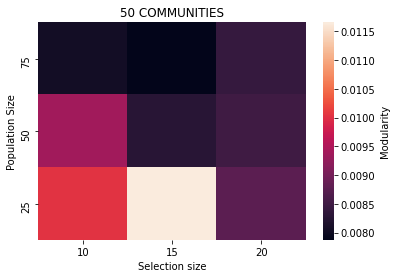

In [ ]:
#G, initialPartition, max_evals, populationNumber, off_size (probability matrix size), sel_size (individuals added to population), number_of_communities
import pandas as pd
populationNumber=[25,50,75]
sel_size=[10,15,20] 

list_pop_size = []
list_sel_size = []
list_avg_umda = []
for popNum in populationNumber:
  for selSize in sel_size:
    avg=0
    for i in range(1,3):
      (bestFitness, bestSol)=Estimation_of_distribution_alg_UMDA(G, partition1, 300, popNum, 10, selSize, 50)
      avg+=bestFitness
    avg/=3
    list_avg_umda.append(avg)
    list_sel_size.append(selSize)
    list_pop_size.append(popNum)
    #ir haciendo la media y añadir a vector o lo que se necesite la media + y especificar los parametros usados: popsize y sel size 

datuak = pd.DataFrame({"Population Size":list_pop_size,"Selection size":list_sel_size,"UMDA":list_avg_umda}) 
print(datuak)

# Sortu heatmap motako plot-a
datuak = datuak.pivot("Population Size", "Selection size", "UMDA")
datuak.sort_index(axis=0, ascending=False, inplace=True)
ax = sns.heatmap(datuak, cbar_kws={'label': 'Modularity', 'orientation': 'vertical'})
ax.set_title('50 COMMUNITIES')
plt.show()

Number Of Communities 100

   Population Size  Selection size      UMDA
0               25              10  0.007848
1               25              15  0.007557
2               25              20  0.006237
3               50              10  0.008525
4               50              15  0.008824
5               50              20  0.006147
6               75              10  0.008000
7               75              15  0.005724
8               75              20  0.006561


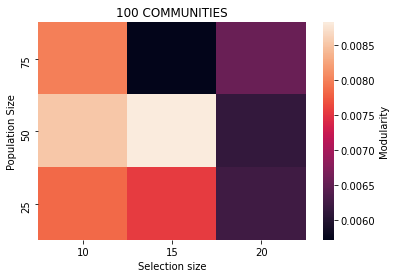

In [ ]:
#G, initialPartition, max_evals, populationNumber, off_size (probability matrix size), sel_size (individuals added to population), number_of_communities
import pandas as pd
populationNumber=[25,50,75]
sel_size=[10,15,20] 

list_pop_size = []
list_sel_size = []
list_avg_umda = []
for popNum in populationNumber:
  for selSize in sel_size:
    avg=0
    for i in range(1,3):
      (bestFitness, bestSol)=Estimation_of_distribution_alg_UMDA(G, partition1, 300, popNum, 10, selSize, 100)
      avg+=bestFitness
    avg/=3
    list_avg_umda.append(avg)
    list_sel_size.append(selSize)
    list_pop_size.append(popNum)
    #ir haciendo la media y añadir a vector o lo que se necesite la media + y especificar los parametros usados: popsize y sel size 

datuak = pd.DataFrame({"Population Size":list_pop_size,"Selection size":list_sel_size,"UMDA":list_avg_umda}) 
print(datuak)

# Sortu heatmap motako plot-a
datuak = datuak.pivot("Population Size", "Selection size", "UMDA")
datuak.sort_index(axis=0, ascending=False, inplace=True)
ax = sns.heatmap(datuak, cbar_kws={'label': 'Modularity', 'orientation': 'vertical'})
ax.set_title('100 COMMUNITIES')
plt.show()

ITERATED LOCAL SEARCH PARAMETER TUNING

Number of Communities 25

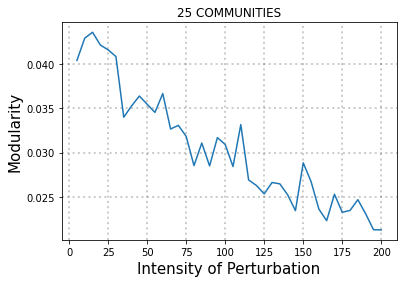

In [20]:
perturbations=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]
fitnessList=[]
for perturb in perturbations:
  avg=0
  for i in range(0,3):
    Fitness, solution = iterated_local_search(G, 300, perturb, 25)
    avg+=Fitness
  avg/=3
  fitnessList.append(avg)


#plt.figure(figsize=(12,5))
plt.grid(b=True, color='black', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('Intensity of Perturbation', fontsize=15)
plt.ylabel('Modularity', fontsize=15)
plt.title('25 COMMUNITIES')
plt.plot(perturbations, fitnessList)
#plt.savefig("Exp2sequence150Generations.png")
#files.download("Exp2sequence150Generations.png") 
plt.show()

Number of Communities 50

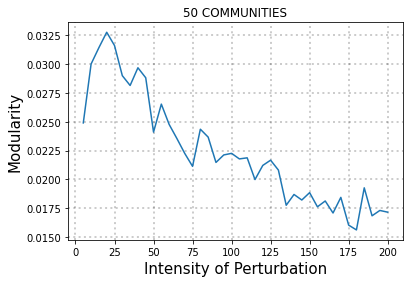

In [18]:
perturbations=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]
fitnessList50=[]
for perturb in perturbations:
  avg=0
  for i in range(0,3):
    Fitness, solution = iterated_local_search(G, 300, perturb, 50)
    avg+=Fitness
  avg/=3
  fitnessList50.append(avg)


#plt.figure(figsize=(12,5))
plt.grid(b=True, color='black', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('Intensity of Perturbation', fontsize=15)
plt.ylabel('Modularity', fontsize=15)
plt.title('50 COMMUNITIES')
plt.plot(perturbations, fitnessList50)
#plt.savefig("Exp2sequence150Generations.png")
#files.download("Exp2sequence150Generations.png") 
plt.show()

Number of Communities 100

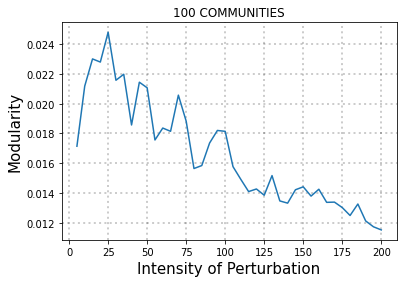

In [19]:
perturbations=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]
fitnessList100=[]
for perturb in perturbations:
  avg=0
  for i in range(0,3):
    Fitness, solution = iterated_local_search(G, 300, perturb, 100)
    avg+=Fitness
  avg/=3
  fitnessList100.append(avg)


#plt.figure(figsize=(12,5))
plt.grid(b=True, color='black', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('Intensity of Perturbation', fontsize=15)
plt.ylabel('Modularity', fontsize=15)
plt.title('100 COMMUNITIES')
plt.plot(perturbations, fitnessList100)
#plt.savefig("Exp2sequence150Generations.png")
#files.download("Exp2sequence150Generations.png") 
plt.show()

AVERAGE OF ILS PARAMETER TUNING

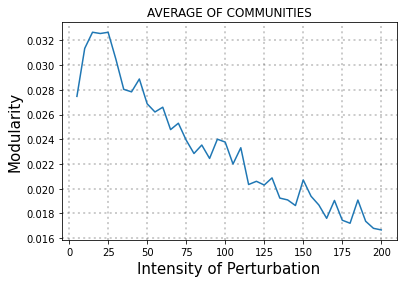

In [21]:
totalFitness=[]
for i in range(0,len(fitnessList)):#puede que sea -1
  totalFitness.append((fitnessList[i]+fitnessList50[i]+fitnessList100[i])/3)

#plt.figure(figsize=(12,5))
plt.grid(b=True, color='black', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('Intensity of Perturbation', fontsize=15)
plt.ylabel('Modularity', fontsize=15)
plt.title('AVERAGE OF COMMUNITIES')
plt.plot(perturbations, totalFitness)
#plt.savefig("Exp2sequence150Generations.png")
#files.download("Exp2sequence150Generations.png") 
plt.show()


FIVE TIME EACH ALGORITHM EXECUTION AND STORING IN listILS, listUMDA and listRS ARRAYS

In [22]:
communities=[10,20,40,60,80,100]
listILS=[]
listUMDA=[]
listRS=[]
for community in communities:
  avgILS=0
  avgUMDA=0
  for i in range(0,5):
    tabular esto al acabar
    fitnessUMDA, solutionUMDA=Estimation_of_distribution_alg_UMDA(G, partition1, 10000, 25, 10, 15, community)
    fitnessILS, solutionILS = iterated_local_search(G, 10000, 25, community)
    fitnessRS, solutionRS = random_search(G, 10000, community)

    print("current community:")
    print(community)
    print("fitnessUMDA:")
    print(fitnessUMDA)
    print("fitnessILS:")
    print(fitnessILS)
    print("fitnessRS:")
    print(fitnessRS)
    listILS.append(fitnessILS)
    listUMDA.append(fitnessUMDA)
    listRS.append(fitnessRS)



fitnessILS:
0.15684777481275752
fitnessILS:
0.1642248564155422
fitnessILS:
0.1561821980443942
fitnessILS:
0.14733829769915077
fitnessILS:
0.1586013701858875
fitnessILS:
0.12054482819717942
fitnessILS:
0.12277312920133075
fitnessILS:
0.12445190439623917
fitnessILS:
0.12324526046248431
fitnessILS:
0.11845370433026992
fitnessILS:
0.09487251720414605
fitnessILS:
0.09720497803040927
fitnessILS:
0.10261638521857298
fitnessILS:
0.099126070897002
fitnessILS:
0.09345293610561095
fitnessILS:
0.08075732894497258
fitnessILS:
0.08767098310853773
fitnessILS:
0.08928376453619986
fitnessILS:
0.08494958811716634
fitnessILS:
0.0889638480013573
fitnessILS:
0.07375263198671722
fitnessILS:
0.07470392294739366
fitnessILS:
0.07356739994527627
fitnessILS:
0.07829431078969898
fitnessILS:
0.07903438083217362
fitnessILS:
0.07627951903252075
fitnessILS:
0.07876211057139244
fitnessILS:
0.07492629946835586
fitnessILS:
0.07601145766215832
fitnessILS:
0.07205387477807298


In [23]:
print(listRS)
print(listILS)
print(listUMDA)

[0.15684777481275752, 0.1642248564155422, 0.1561821980443942, 0.14733829769915077, 0.1586013701858875, 0.12054482819717942, 0.12277312920133075, 0.12445190439623917, 0.12324526046248431, 0.11845370433026992, 0.09487251720414605, 0.09720497803040927, 0.10261638521857298, 0.099126070897002, 0.09345293610561095, 0.08075732894497258, 0.08767098310853773, 0.08928376453619986, 0.08494958811716634, 0.0889638480013573, 0.07375263198671722, 0.07470392294739366, 0.07356739994527627, 0.07829431078969898, 0.07903438083217362, 0.07627951903252075, 0.07876211057139244, 0.07492629946835586, 0.07601145766215832, 0.07205387477807298]


SINCE LOW MEMORY AVAILABLE IN COLAB, THE EXTRACTION OF UPPER VECTORS IS DONE MANUALLY HERE, FOR LATER PRINTING WITH DATAFRAME.

In [24]:
import pandas as pd
communities=[10,10,10,10,10,20,20,20,20,20,40,40,40,40,40,60,60,60,60,60,80,80,80,80,80,100,100,100,100,100]

RandomSearch=[0.026111874432208422, 0.02668432439217902, 0.023767604194964306, 0.02412707612714086,0.022183140835848048, 0.01869041559646433, 0.016555200537691883, 0.01891798172017597, 0.017439762196874077, 0.015938291618734356, 0.014481484314650435, 0.013063251695569895, 0.01482375291802781, 0.012346064940809103,0.013175624983450478, 0.009149923455402593, 0.013911608724547653, 0.009835073607363973, 0.010620991951293903,0.010365066896022585, 0.008872586180913314, 0.009060842085373623, 0.009744357716784006, 0.009113555373143059,0.011319708623828492, 0.010980300431415357, 0.009176075784218442, 0.008355791645703943, 0.008893181139855787,0.009706763744111235]
IteratedLocalSearch=[0.15684777481275752, 0.1642248564155422, 0.1561821980443942, 0.14733829769915077, 0.1586013701858875, 0.12054482819717942, 0.12277312920133075, 0.12445190439623917, 0.12324526046248431, 0.11845370433026992, 0.09487251720414605, 0.09720497803040927, 0.10261638521857298, 0.099126070897002, 0.09345293610561095, 0.08075732894497258, 0.08767098310853773, 0.08928376453619986, 0.08494958811716634, 0.0889638480013573, 0.07375263198671722, 0.07470392294739366, 0.07356739994527627, 0.07829431078969898, 0.07903438083217362, 0.07627951903252075, 0.07876211057139244, 0.07492629946835586, 0.07601145766215832, 0.07205387477807298]
EstimationDistribution=[0.038765024921534906, 0.04263087033969591, 0.043809318793946214, 0.039055070593308025,0.0445252387952799, 0.04070278989774764, 0.044502232918524655, 0.0455697791533903, 0.04648809366195047,0.03926849811425359, 0.036476696150148355, 0.03895225925065076, 0.038991038250723004, 0.03816168252315053,0.047242179718149806, 0.026775734953993147, 0.046222157168304266, 0.030091114713594404, 0.04340346734113516,0.043326358834142195, 0.038863504784731995, 0.03142480175717494, 0.03563761502529743, 0.03565571734039964,0.028471754340714507, 0.024461825935983682, 0.024074648880467852, 0.019482422529446736, 0.021501137135947354,0.027028636146245164]
datuak = pd.DataFrame({"Community Size": communities,"Random Search Points": RandomSearch,"ILS Points":IteratedLocalSearch,"UMDA Points":EstimationDistribution}) 
print(datuak)


    Community Size  Random Search Points  ILS Points  UMDA Points
0               10              0.026112    0.156848     0.038765
1               10              0.026684    0.164225     0.042631
2               10              0.023768    0.156182     0.043809
3               10              0.024127    0.147338     0.039055
4               10              0.022183    0.158601     0.044525
5               20              0.018690    0.120545     0.040703
6               20              0.016555    0.122773     0.044502
7               20              0.018918    0.124452     0.045570
8               20              0.017440    0.123245     0.046488
9               20              0.015938    0.118454     0.039268
10              40              0.014481    0.094873     0.036477
11              40              0.013063    0.097205     0.038952
12              40              0.014824    0.102616     0.038991
13              40              0.012346    0.099126     0.038162
14        

AVERAGE IS DONE AND PLOT OF THE ALGORITHMS IS DONE.

[0.025172719786623155, 0.019086684672545057, 0.01523069745645719, 0.012373841574422496, 0.011183185294807028, 0.0091978353390535]


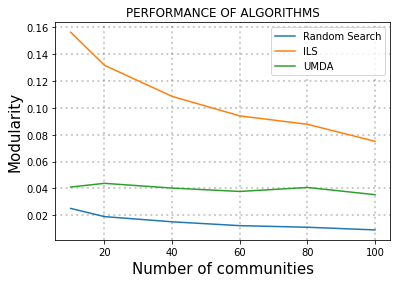

In [25]:
communities=[10,20,40,60,80,100]
RandomSearchAvg=[]
ILSAvg=[]
UMDAAvg=[]
RSAverage=0
ILSAverage=0
UMDAAverage=0

for i in range(0,len(RandomSearch)):
  RSAverage+=RandomSearch[i]
  ILSAverage+=IteratedLocalSearch[i]
  UMDAAverage+=EstimationDistribution[i]
  if i==3 or i==7 or i==11 or i==15 or i==19 or i==23:
    RSAverage/=4
    ILSAverage/=4
    UMDAAverage/=4
    RandomSearchAvg.append(RSAverage)
    ILSAvg.append(ILSAverage)
    UMDAAvg.append(UMDAAverage)
    RSAverage=0
    ILSAverage=0
    UMDAAverage=0
  
print(RandomSearchAvg)

#plt.figure(figsize=(12,5))
plt.grid(b=True, color='black', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('Number of communities', fontsize=15)
plt.ylabel('Modularity', fontsize=15)
plt.title('PERFORMANCE OF ALGORITHMS')
plt.plot(communities, RandomSearchAvg, label="Random Search")
plt.plot(communities, ILSAvg, label="ILS")
plt.plot(communities, UMDAAvg, label="UMDA")
plt.legend(loc='upper right')
#plt.savefig("Exp2sequence150Generations.png")
#files.download("Exp2sequence150Generations.png") 
plt.show()
